<span style='color:blue'>Capstone Project - Sales Forecasting </span>


upGrad & IIIT-B | Data Science Program - Februrary 2022 <br>
Batch ID - 1974

 <span style='color:green'>Prashik Bansod, </span>
 <span style='color:green'>Shashidhar Harti, </span>
 <span style='color:green'>Debraj Bhattacharjee </span>


- Validating AWS Sagemaker Notebook Python Version

In [1]:
import platform

In [2]:
print(platform.machine())

x86_64


In [3]:
import sys
sys.version 

'3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]'

 Steps Followed

    1. Importing all necessary packages
    2. Reading and Understanding data
    3. Data Cleaning
        - Handling Null values 
    4. Exploratory Data Analysis
        - Bivariant Analysis
        - Multivariant Analysis
        - Feature Engineering
    5. Time Series Analysis
        - VAR [Vector AutoRegression Model]
        - VARMAX
    6. Final Result Summary

### 1. Importing Necessary Libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import statsmodels.api as sm
from pylab import rcParams

### 2. Reading and Understanding Data

In [5]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 3. Data Cleaning

#### Handling Null Values

In [10]:
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [11]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna(0, inplace=True)

In [12]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [13]:
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

In [14]:
store['CompetitionOpenSinceYear'].isnull().sum()

354

In [15]:
store.CompetitionOpenSinceYear.fillna(0,inplace=True)
store.CompetitionOpenSinceMonth.fillna(0,inplace=True)

In [16]:
# Checking null values

100*store.isnull().sum()/store.shape[0]

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [17]:
train = train.merge(right=store, on='Store', how='inner')

In [18]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [19]:
# Checking percentage of null records

100*train.isnull().sum()/train.shape[0]

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

### 4. EDA

#### Bivariate Analysis on Data

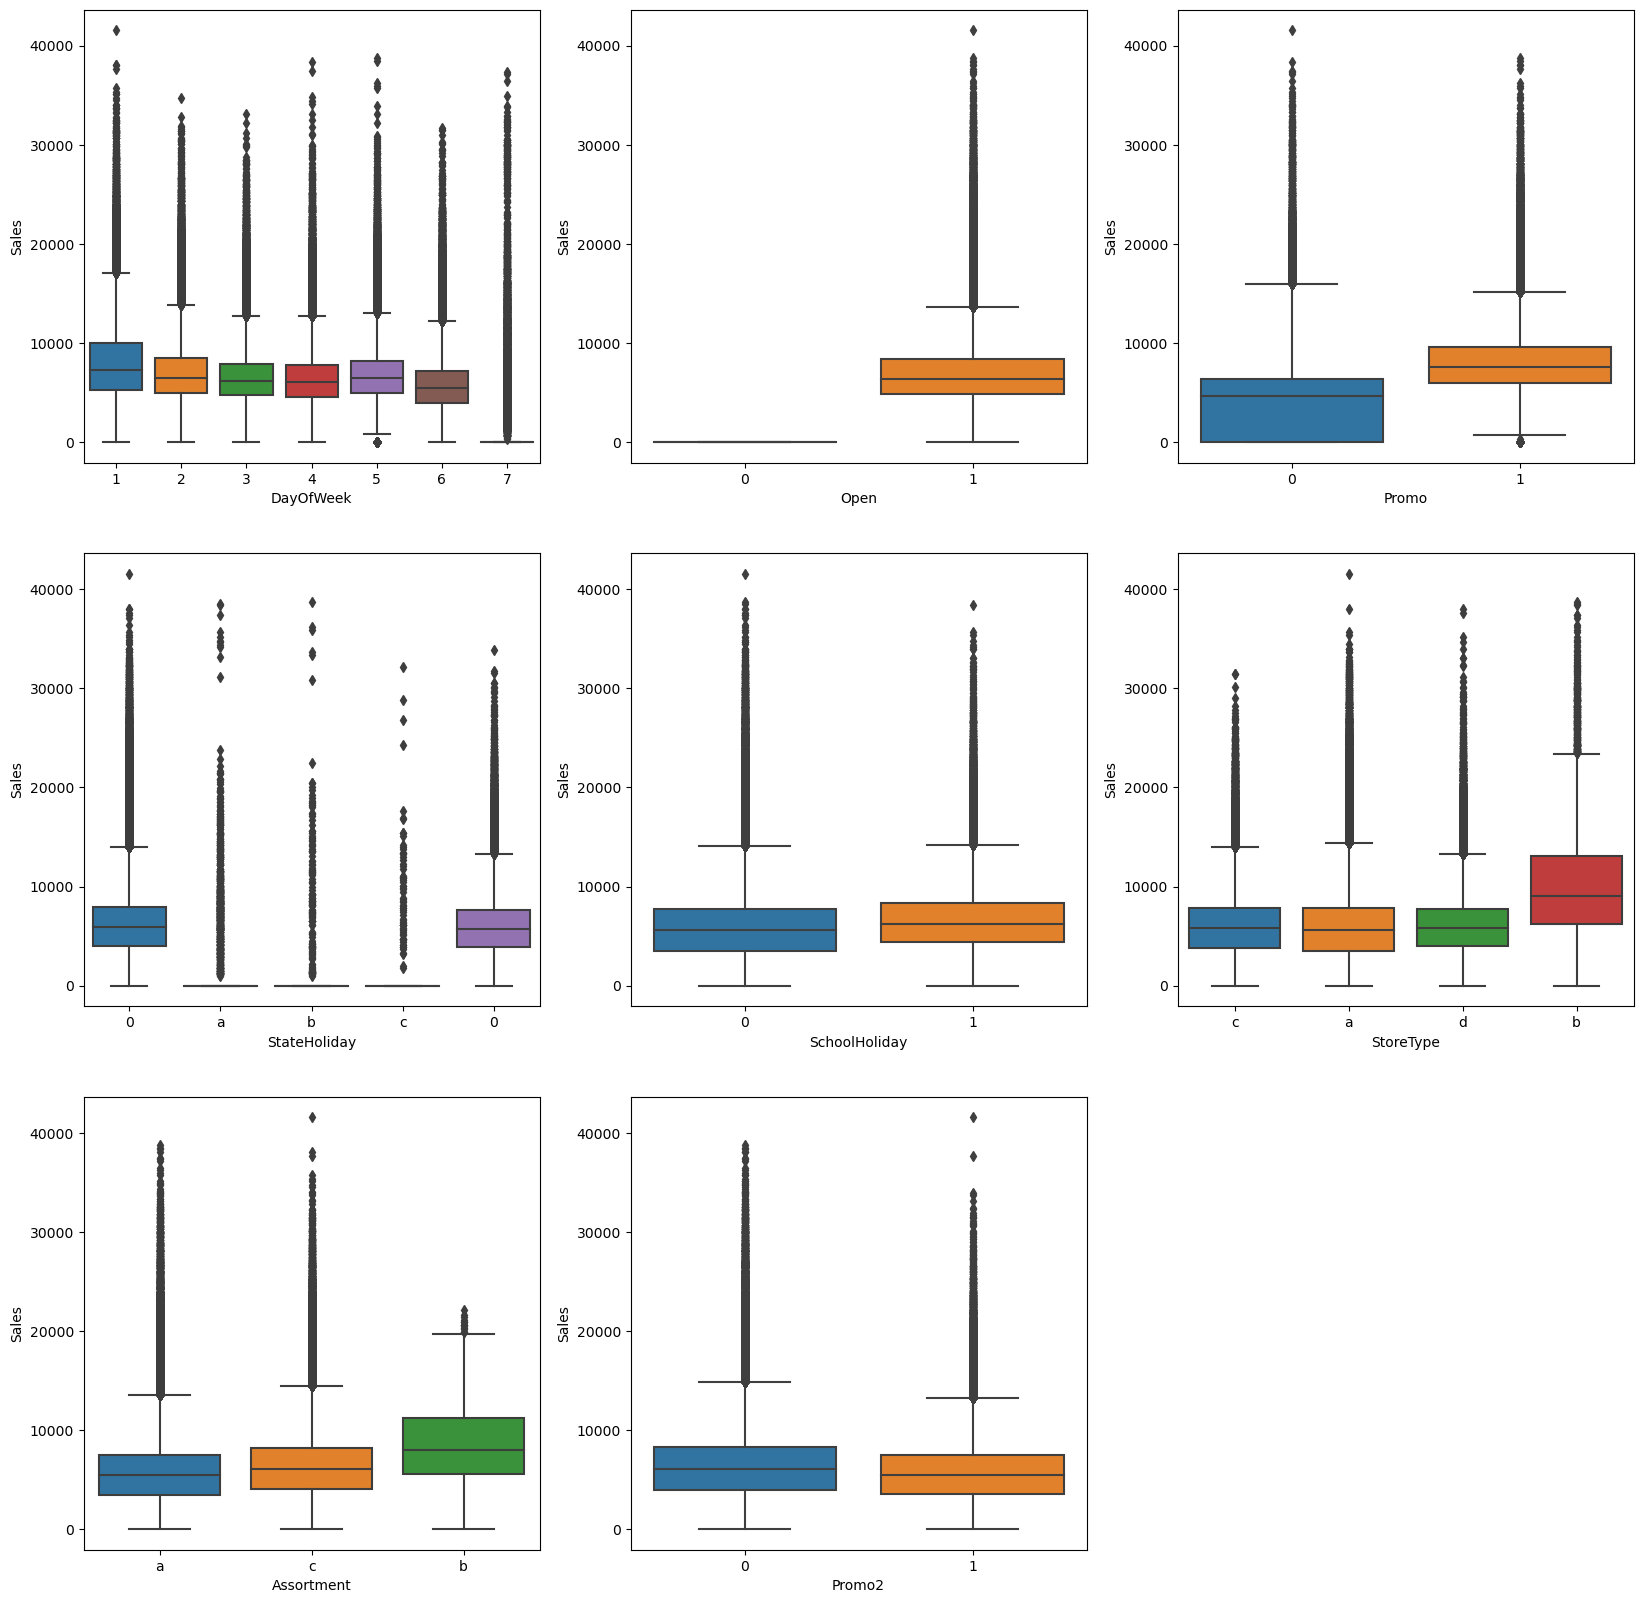

In [20]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = train)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = train)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = train)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = train)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = train)
plt.show()

- Sales are higher on 1st, 2nd and 5th weekdays. Sales are very low on 7th weekday.
- Sales are higher when promotion is 1
- On state holidays, a, b and c, sales are low
- School holidays do not seem to impact sales
- Store type B has higher % of sales than other store types
- Assortment type B has higher sales
- Promo2 does not seem to have much contribution to sales

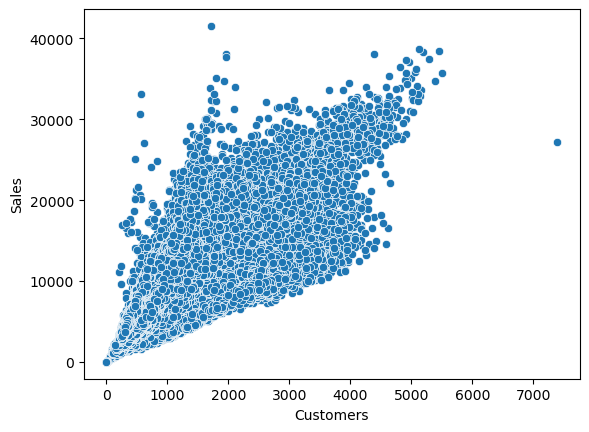

In [21]:
# Boxplots of Customers against Sales

sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()

#### Multivariant Analysis

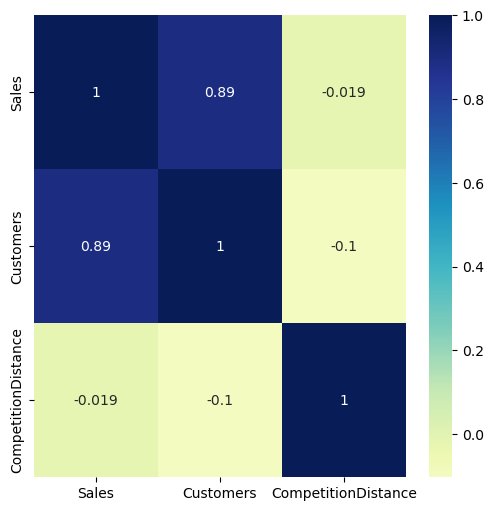

In [22]:
# Checking co-relation coefficients for numercial variables

# plot heat map for corr
cor = train[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

- Sales and customer have a very strong co-relation with a factor of 0.89. For other variables, it is insignificant.

#### Feature Engineering

In [23]:
# Creating dummy variable for day of the week 

dummies=pd.get_dummies(train['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
train=pd.concat([train,dummies],axis=1)

In [24]:
# Creating dummy variable for StoreType 

dummies=pd.get_dummies(train['StoreType'],drop_first=True,prefix='StoreType')
train=pd.concat([train,dummies],axis=1)

In [25]:
# Creating dummy variable for Assortment 

dummies=pd.get_dummies(train['Assortment'],drop_first=True,prefix='Assortment')
train=pd.concat([train,dummies],axis=1)

In [26]:
# Viewing data

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Dropping DayOfWeek, StoreType and Assortment

train.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [29]:
# Dropping CompetitionOpenSinceMonth, CompetitionOpenSinceYear fields

train.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)

In [30]:
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']

10362      0-0-01
10363      0-0-01
10364      0-0-01
10365      0-0-01
10366      0-0-01
            ...  
1017204    0-0-01
1017205    0-0-01
1017206    0-0-01
1017207    0-0-01
1017208    0-0-01
Name: CompetitionOpenSince, Length: 323348, dtype: object

In [31]:
#Imputing them with null

train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']=np.nan

In [32]:
#Checking datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

In [33]:
#Converting date field to datetime object

train['Date']=pd.to_datetime(train['Date'],errors='coerce')

In [34]:
#Converting CompetitionOpenSince field to datetime object

train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'],errors='coerce')

In [35]:
#Checking data types again

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

- There will be store transaction dates where sales were made before competition started and sales after competition. Let's create a new flag for their identification

In [36]:
def calculate_compitition(row):
    if row.CompetitionOpenSince>row.Date:
        return 1
    else:
        return 0
train['Before_Competition']=train[['CompetitionOpenSince','Date']].apply(calculate_compitition,axis=1)

In [37]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince,Before_Competition
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,1,0,0,0,1,0,0,0,2008-09-01,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0


In [38]:
train.drop(['Before_Competition'],inplace=True,axis=1)
train.drop(['CompetitionOpenSince'],inplace=True,axis=1)

In [39]:
train.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'],inplace=True,axis=1)

In [40]:
#Setting date as index

train_df=train.set_index('Date')
train_df.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,1,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0,0,0,0,0,0,0,1,0,0,0


## 5. Time Series Analysis

- From our earlier analysis, we have seen that increase in Customers directly translates to increase in Sales meaning customer counts are an endogenous variable for our predictions

In [41]:
# Grouping the data at a date level for analysis

train_df_all=train_df.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
train_df_all.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6233.030493,748.049327,0,1115,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,5693.112108,682.547085,0,1040,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,5954.218834,701.468161,0,1040,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,5337.751570,616.566816,0,112,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
def timeseries_plot(series,c):
    fig = plt.figure(figsize=(20, 3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title('For {}'.format(c))
    plt.show()

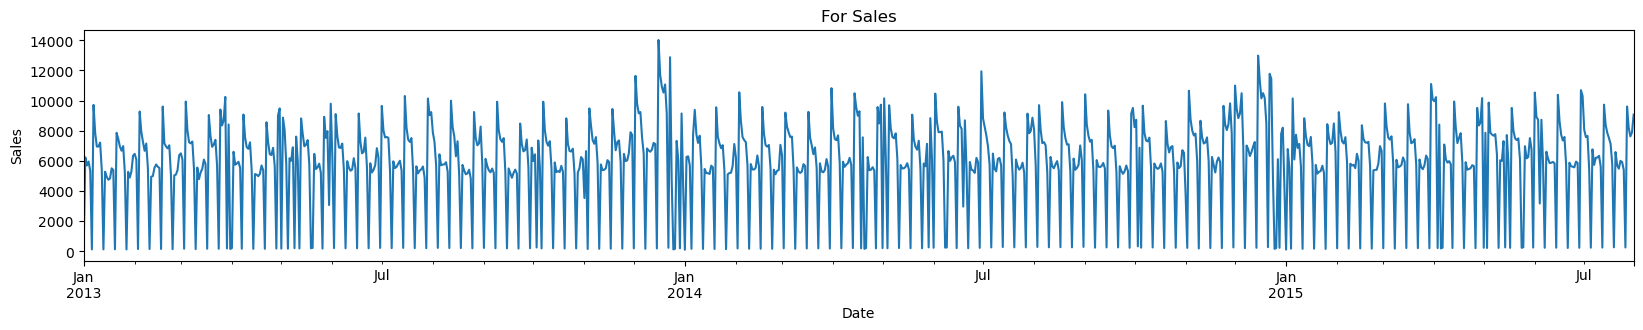

In [43]:
# Plotting time series chart for Sales

timeseries_plot(train_df_all['Sales'],'Sales')

In [44]:


def plot_seasonal_decomposition(series,c,model):
    rcParams['figure.figsize'] = 18, 14
    plt.figure(figsize=(18,14))
    decomposition = sm.tsa.seasonal_decompose(series, model=model) # additive seasonal index
    fig = decomposition.plot()
    plt.show()
    print('Mean Residual for {}={}'.format(c,decomposition.resid.mean()))

<Figure size 1800x1400 with 0 Axes>

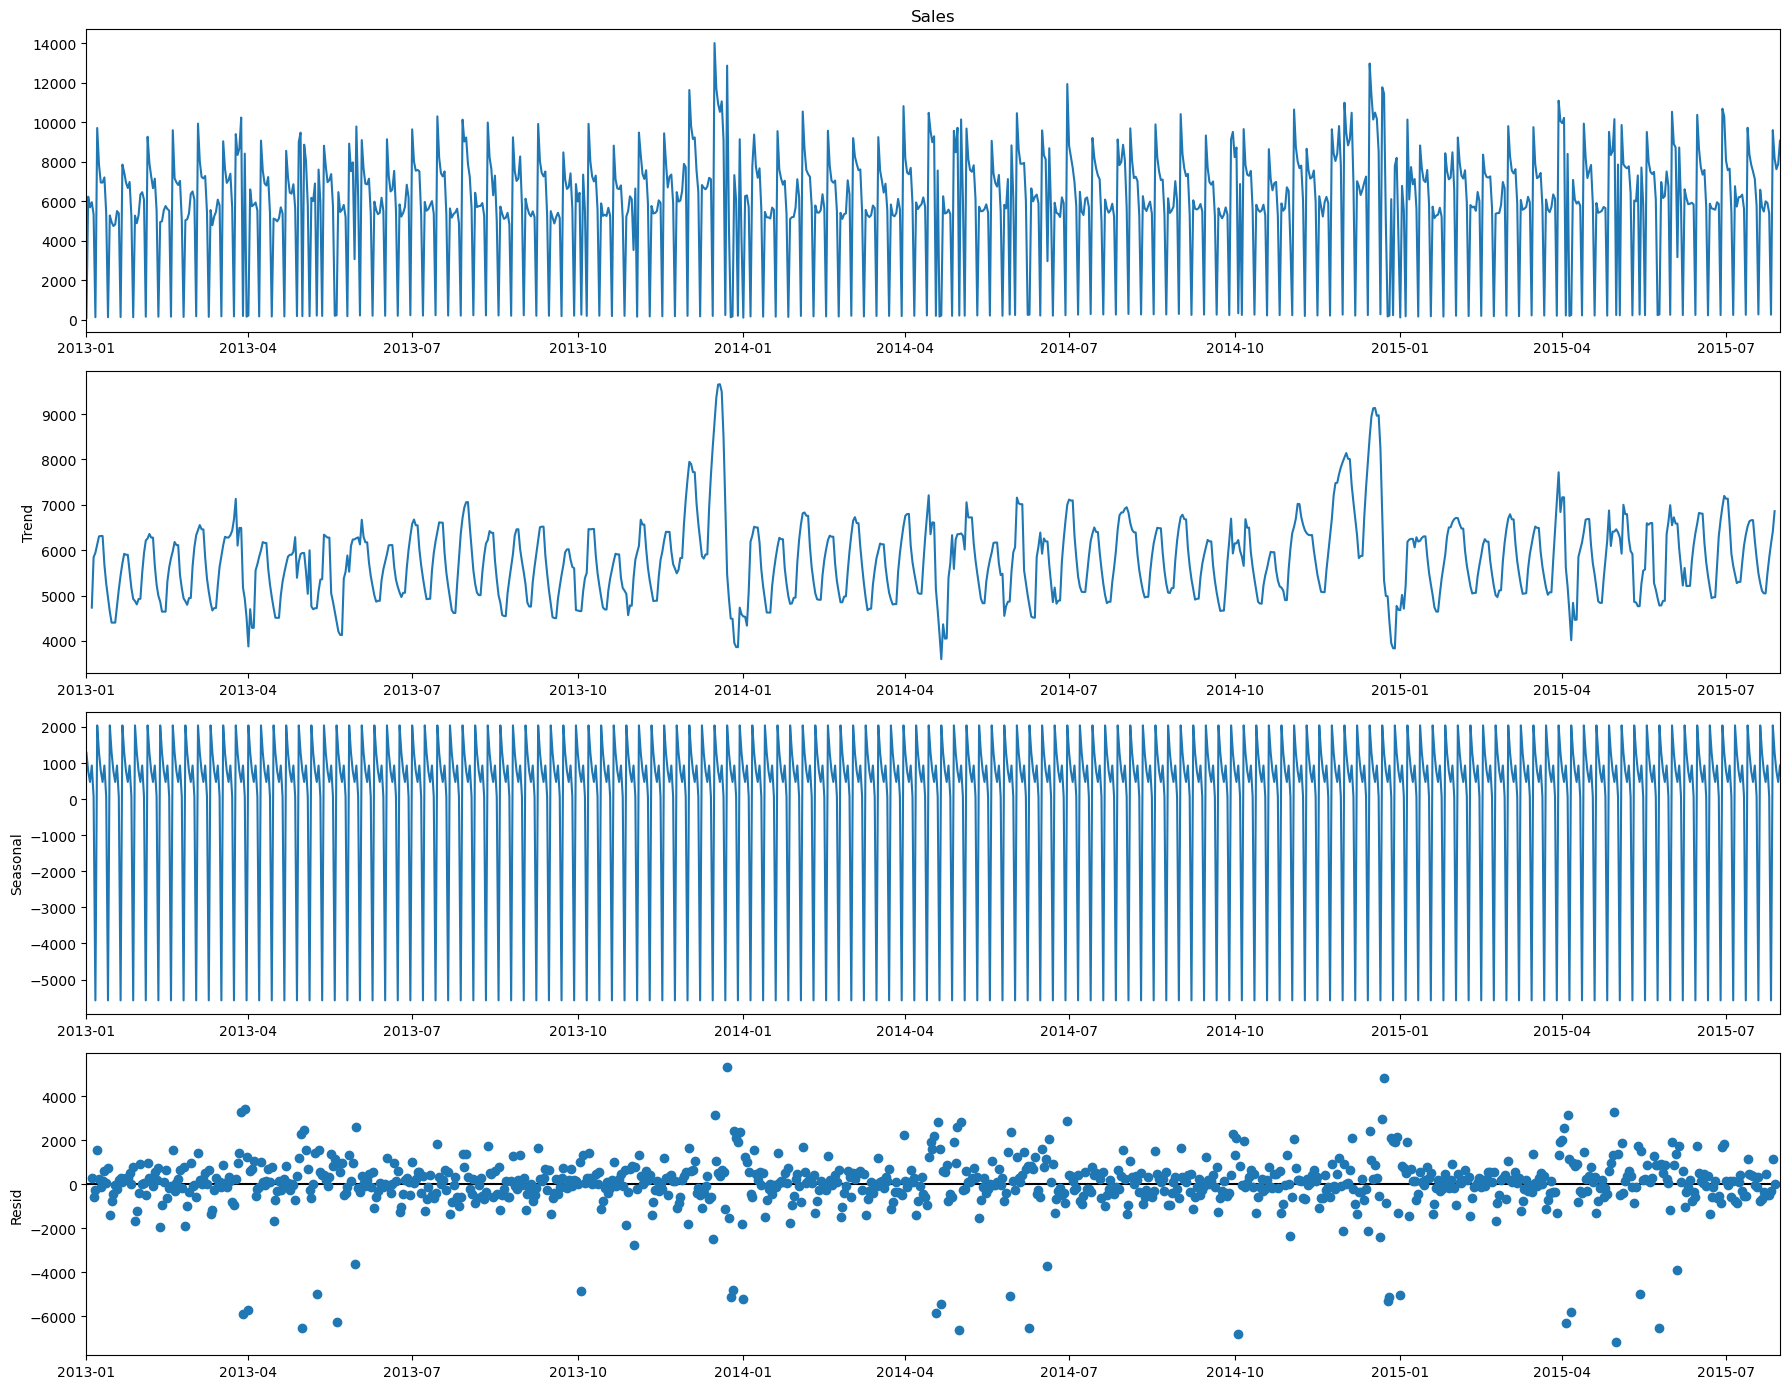

Mean Residual for Sales=0.6202792140320115


In [45]:
plot_seasonal_decomposition(train_df_all['Sales'],'Sales','additive')

In [46]:
from statsmodels.tsa.stattools import grangercausalitytests

causality_sales=grangercausalitytests(train_df_all[['Sales','Customers']].dropna(), 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=207.9810, p=0.0000  , df=1
likelihood ratio test: chi2=187.9060, p=0.0000  , df=1
parameter F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2
ssr based chi2 test:   chi2=236.8316, p=0.0000  , df=2
likelihood ratio test: chi2=211.2191, p=0.0000  , df=2
parameter F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3
ssr based chi2 test:   chi2=255.7290, p=0.0000  , df=3
likelihood ratio test: chi2=226.1668, p=0.0000  , df=3
parameter F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=70.9777 , p=0.0000  

In [47]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ',c)
        print('*'*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  

In [48]:
stationary_test(train_df_all[['Sales','Customers']])

For  Sales
****************************************************************************************************
ADF Statistic= -5.6508228372079
P value= 9.870006549261686e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
For  Customers
****************************************************************************************************
ADF Statistic= -5.933710149589012
P value= 2.347773537918905e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


-  The p-values for both the variables is less than 0.05. We can reject the null hypothesis. The series is stationary

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def plot_acf_pacf(series,c):
    rcParams['figure.figsize'] = 20, 3
    plot_acf(series, lags = 75)
    plt.title('ACF for {}'.format(c)) 
    plot_pacf(series, lags = 75)
    plt.title('PACF for {}'.format(c)) 
    plt.show()

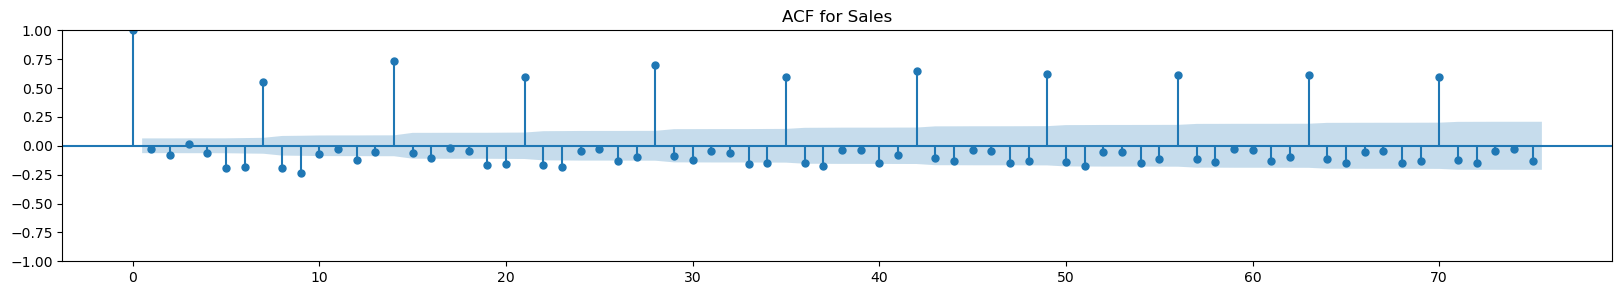

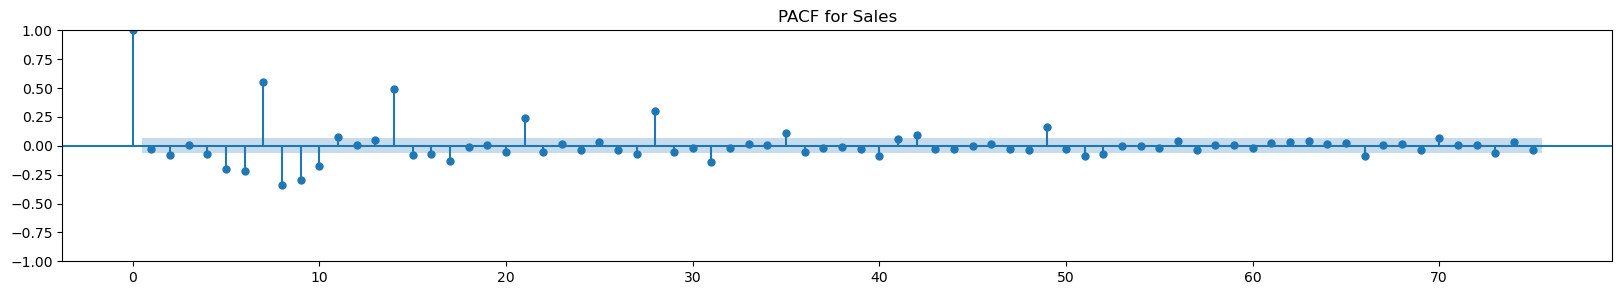

In [50]:
#Plotting ACF and PACF for sales

plot_acf_pacf(train_df_all['Sales'],'Sales')

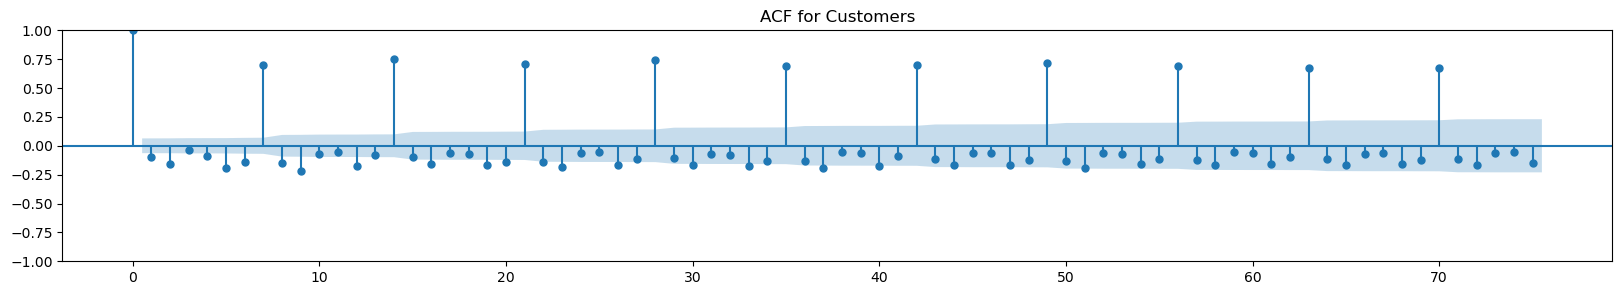

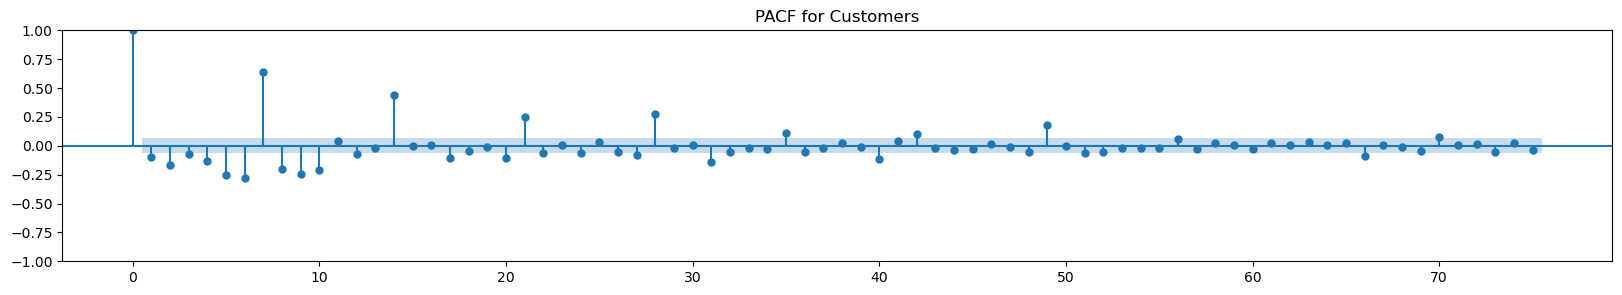

In [51]:
#Plotting ACF and PACF for Customers

plot_acf_pacf(train_df_all['Customers'],'Customers')

 For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set p=7, since it is the highest lag since inception.

In [52]:
train_df_all.shape

(942, 10)

In [53]:
#Creating train and test splits

train_len=900
train_df_all_train=train_df_all.iloc[:train_len,:]
train_df_all_test=train_df_all.iloc[train_len:,:]

 Standardising numerical values in test-train datasets using minmax

In [54]:
from sklearn.preprocessing import MinMaxScaler


# Fit transform on train data

scaler = MinMaxScaler()
train_df_all_train[['Sales','Customers','Promo','SchoolHoliday']]=scaler.fit_transform(train_df_all_train[['Sales','Customers','Promo','SchoolHoliday']])
train_df_all_train.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.441350,0.543373,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,0.402577,0.494654,0.0,0.932735,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,0.421328,0.508727,0.0,0.932735,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,0.377057,0.445579,0.0,0.100448,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
#Transform on test data

train_df_all_test[['Sales','Customers','Promo','SchoolHoliday']]=scaler.transform(train_df_all_test[['Sales','Customers','Promo','SchoolHoliday']])
train_df_all_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-06-21,0.009824,0.015096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-06-22,0.415762,0.489576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06-23,0.399006,0.475851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-06-24,0.396755,0.474848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### VAR [Vector AutoRegressive Model]

In [56]:
exog = train_df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.15      -12.05   5.280e-06      -12.11
1       -12.27      -12.15   4.698e-06      -12.22
2       -12.27      -12.12   4.712e-06      -12.21
3       -12.30      -12.14   4.533e-06      -12.24
4       -12.31      -12.12   4.515e-06      -12.24
5       -12.31      -12.10   4.510e-06      -12.23
6       -12.32      -12.09   4.469e-06      -12.23
7       -12.32      -12.07   4.448e-06      -12.23
8       -12.48      -12.20   3.821e-06      -12.37
9       -12.51     -12.21*   3.707e-06      -12.39
10      -12.52      -12.21   3.648e-06      -12.40
11      -12.54      -12.20   3.581e-06      -12.41
12      -12.53      -12.18   3.604e-06      -12.40
13      -12.54      -12.16   3.574e-06      -12.40
14      -12.59      -12.19   3.421e-06     -12.43*
15     -12.59*      -12.17  3.395e-06*      -12.43
-------------------------------

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [57]:
#Fitting the model with lag 11

var_model_final = var_model.fit(11)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Mar, 2023
Time:                     11:38:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2106
Nobs:                     889.000    HQIC:                  -12.4169
Log likelihood:           3115.22    FPE:                3.56415e-06
AIC:                     -12.5446    Det(Omega_mle):     3.32801e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.337940         0.057254            5.902           0.000
Promo                 0.169451         0.016244           10.432           0.000
SchoolHoliday        -0.033177         0.012687           -2

In [58]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [59]:
train_df_all['Sales']=train_df_all['Sales'].apply(lambda x:round(x))
train_df_all['Customers']=train_df_all['Customers'].apply(lambda x:round(x))

In [60]:
cointegration_test(train_df_all[['Sales','Customers']],10)
rank_result=select_coint_rank(train_df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  55.77     > 12.3212   =>   True
Customers ::  0.32      > 4.1296    =>   False


 We have the rank of Johassen test as 2 which means that the time series are stationary but do not seem to be co-integratied

In [61]:
# Getting lag order

lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = train_df_all_train[['Sales','Customers']].values[-lag_order:]
forecast_input

11


array([[0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

 Forecasting using VAR

In [62]:
exog_test = train_df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=train_df_all_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.441004,0.500055
2015-06-21,0.015879,0.013267
2015-06-22,0.427535,0.508562
2015-06-23,0.414973,0.506646
2015-06-24,0.377980,0.462299
2015-06-25,0.343401,0.426233
2015-06-26,0.434158,0.515352
2015-06-27,0.419477,0.473930
2015-06-28,0.021367,0.018221


In [63]:
#Adding forecasted values

train_df_all_test['VarForecastedSales']=var_forecast.Sales
train_df_all_test['VarForecastedCustomers']=var_forecast.Customers

In [64]:


def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

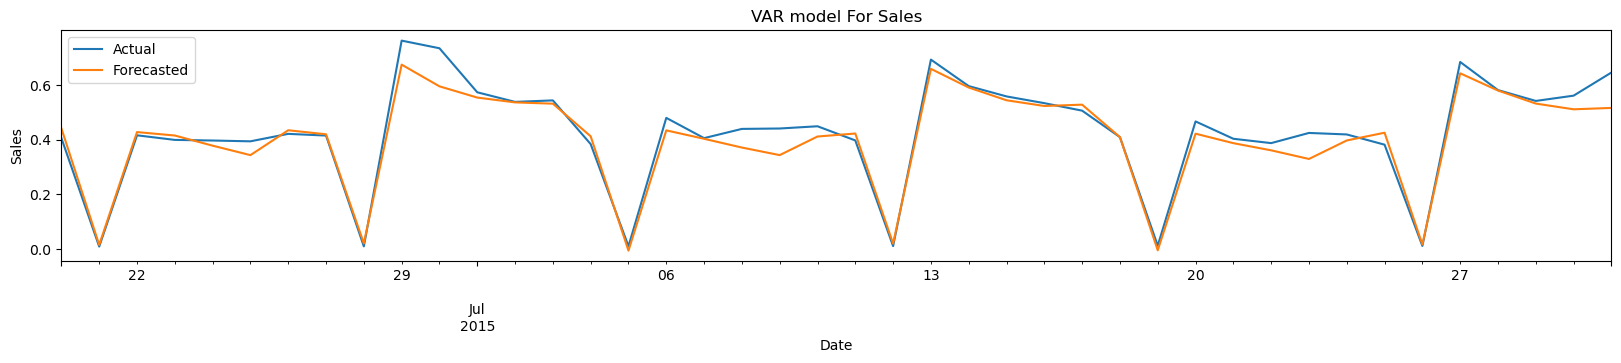

In [65]:
forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarForecastedSales'],'Sales','VAR')

In [66]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [67]:
d=summary(train_df_all_test['Sales'], train_df_all_test['VarForecastedSales'],
       train_df_all_test['Customers'], train_df_all_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.1


#### VARMAX

In [68]:
#modelling

exog = train_df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3029.984
                              + intercept   AIC                          -5961.967
Date:                    Tue, 07 Mar 2023   BIC                          -5726.650
Time:                            11:41:02   HQIC                         -5872.074
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.29, 38.39   Jarque-Bera (JB):     5558.38, 1842.50
Prob(Q):                        0.26, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.61, 1.51   Skew:                     -1.77, -1.50
P

In [69]:
#forecasting on test data

exog_test = train_df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= train_df_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=train_df_all_test.index.min(),end=train_df_all_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=train_df_all_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.443296,0.502287
2015-06-21,0.010952,0.010540
2015-06-22,0.462467,0.529422
2015-06-23,0.403424,0.496568
2015-06-24,0.363365,0.459548


In [70]:
#Adding forecasted values

train_df_all_test['VarmaxForecastedSales']=varmax_forecast.Sales
train_df_all_test['VarmaxForecastedCustomers']=varmax_forecast.Customers

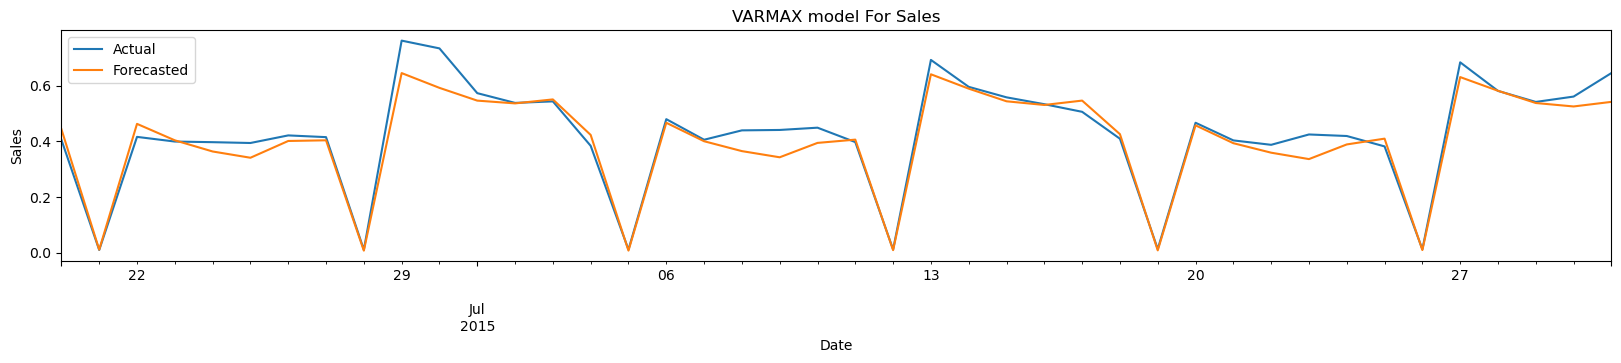

In [71]:
#Plotting time series

forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSales'],'Sales','VARMAX')

## 6. Final Result Summary

In [72]:
#Printing results

d=summary(train_df_all_test['Sales'], train_df_all_test['VarmaxForecastedSales'],
       train_df_all_test['Customers'], train_df_all_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.10
0,All,VARMAX,0.05,9.75,0.03,8.07
